Generasi ke- 0
Jalur terbaik:  [[0, 0], [0, 0], [94, 14], [44, 52], [75, 30], [47, 20], [94, 82], [18, 89], [90, 77], [52, 75], [100, 100], [100, 100]]
Generasi ke- 1
Jalur terbaik:  [[0, 0], [0, 0], [66, 9], [60, 43], [55, 6], [83, 31], [51, 60], [31, 44], [62, 4], [80, 75], [100, 100], [100, 100]]
Generasi ke- 2
Jalur terbaik:  [[0, 0], [0, 0], [88, 17], [71, 70], [63, 24], [56, 66], [81, 58], [80, 74], [85, 62], [63, 49], [18, 84], [18, 84]]
Generasi ke- 3
Jalur terbaik:  [[0, 0], [0, 0], [33, 74], [77, 21], [67, 25], [85, 29], [25, 6], [46, 22], [85, 62], [63, 49], [18, 84], [18, 84]]
Generasi ke- 4
Jalur terbaik:  [[0, 0], [0, 0], [33, 74], [77, 21], [67, 25], [0, 78], [19, 51], [27, 87], [85, 62], [63, 49], [18, 84], [18, 84]]
Generasi ke- 5
Jalur terbaik:  [[0, 0], [0, 0], [33, 74], [77, 21], [67, 25], [0, 78], [19, 51], [97, 8], [59, 98], [88, 46], [18, 84], [18, 84]]
Generasi ke- 6
Jalur terbaik:  [[95, 21], [95, 21], [33, 74], [91, 20], [42, 80], [69, 35], [47, 72], [97, 8], 

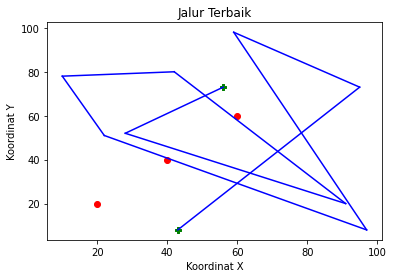

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# fungsi untuk menghitung jarak antara dua titik
def distance(x1, y1, x2, y2):
  return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# fungsi untuk menghitung fitness dari suatu jalur
def fitness(path, obstacles):
  # inisialisasi fitness dengan jarak total jalur
  fitness = 0
  for i in range(len(path) - 1):
    fitness += distance(path[i][0], path[i][1], path[i + 1][0], path[i + 1][1])

  # tambahkan penalty jika jalur menabrak obstacle
  for o in obstacles:
    for i in range(len(path) - 1):
      if o[0] <= max(path[i][0], path[i + 1][0]) and o[0] >= min(path[i][0], path[i + 1][0]) and \
         o[1] <= max(path[i][1], path[i + 1][1]) and o[1] >= min(path[i][1], path[i + 1][1]):
        fitness += 1000
  return fitness

# fungsi untuk menghitung total fitness dari populasi
def total_fitness(pop, obstacles):
  total = 0
  for i in range(len(pop)):
    total += fitness(pop[i], obstacles)
  return total

# fungsi untuk menentukan jalur terbaik dari populasi
def best_path(pop, obstacles):
  best = pop[0]
  for p in pop:
    if fitness(p, obstacles) < fitness(best, obstacles):
      best = p
  return best

# fungsi untuk menggabungkan dua jalur menjadi satu jalur baru
def crossover(p1, p2):
  # pilih titik potong secara acak
  cut = np.random.randint(1, len(p1) - 1)

  # gabungkan bagian awal dari jalur pertama dengan bagian akhir dari jalur kedua
  new_path = p1[:cut] + p2[cut:]
  return new_path

# fungsi untuk melakukan mutasi pada suatu jalur dengan mengubah titik acak
def mutate(path):
  # pilih titik yang akan diubah secara acak
  idx = np.random.randint(0, len(path))

  # ubah nilai titik tersebut secara acak
  path[idx][0] = np.random.randint(0, 100)
  path[idx][1] = np.random.randint(0, 100)
  return path




# inisialisasi daftar obstacle
obstacles = [[20, 20], [40, 40], [60, 60]]

# inisialisasi titik awal dan akhir
start = [0, 0]
end = [100, 100]

# inisialisasi populasi dengan jalur acak
# inisialisasi populasi dengan jalur acak
pop_size = 100
pop = []
for i in range(pop_size):
  # buat jalur acak dengan 8 titik di antara titik awal dan akhir
  path = []
  for j in range(8):
    path.append([np.random.randint(start[0], end[0]), np.random.randint(start[1], end[1])])
  # tambahkan titik awal dan akhir ke jalur
  path = [start] + path + [end]
  pop.append(path)

# tambahkan titik awal dan akhir ke setiap jalur di populasi
for i in range(len(pop)):
  pop[i] = [start] + pop[i] + [end]


# loop selama beberapa generasi
for i in range(10):
  # hitung total fitness dari populasi
  total_fit = total_fitness(pop, obstacles)

  # buat populasi baru dengan memilih jalur dari populasi lama
  # berdasarkan proporsi fitnessnya
  print("Generasi ke-", i)
  print("Jalur terbaik: ", best_path(pop, obstacles))
  new_pop = []
  for j in range(pop_size):
    # pilih jalur pertama secara acak berdasarkan fitness
    idx1 = np.random.randint(0, total_fit)
    p1 = pop[0]
    curr_fit = fitness(p1, obstacles)
    while idx1 > curr_fit:
        idx1 -= curr_fit
        p1 = pop[pop.index(p1) + 1]
        curr_fit = fitness(p1, obstacles)

    # pilih jalur kedua secara acak berdasarkan fitness
    idx2 = np.random.randint(0, total_fit)
    p2 = pop[0]
    curr_fit = fitness(p2, obstacles)
    while idx2 > curr_fit:
      idx2 -= curr_fit
      p2 = pop[pop.index(p2) + 1]
      curr_fit = fitness(p2, obstacles)

    # lakukan crossover pada jalur yang dipilih
    new_path = crossover(p1, p2)

    # lakukan mutasi pada jalur baru dengan probabilitas 1%
    if np.random.randint(0, 100) == 0:
      new_path = mutate(new_path)

    # tambahkan jalur baru ke populasi baru
    new_pop.append(new_path)
    # print("Jalur baru: ", new_path)
    # print("Fitness: ", fitness(new_path, obstacles))

  # ganti populasi lama dengan populasi baru
  pop = new_pop


# print("Jalur terbaik: ", best_path(pop, obstacles))
# print("Fitness: ", fitness(best_path(pop, obstacles), obstacles))

# cari jalur terbaik dari populasi akhir
best_path = best_path(pop, obstacles)

# plot jalur terbaik dan obstacle
for o in obstacles:
  plt.scatter(o[0], o[1], c="r")

# tambahkan titik awal dan akhir ke plot
plt.scatter(start[0], start[1], c="g", marker="P")
plt.scatter(end[0], end[1], c="g", marker="P")

for i in range(len(best_path) - 1):
  plt.plot([best_path[i][0], best_path[i + 1][0]], [best_path[i][1], best_path[i + 1][1]], c="b")

plt.title("Jalur Terbaik")
plt.xlabel("Koordinat X")
plt.ylabel("Koordinat Y")
plt.show()


